In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Data/Mall_Customers.csv",index_col="CustomerID")
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df['Genre']=df['Genre'].map({"Male":1,'Female':0})
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [ ]:
#min points = 5

### Kdistance plot for Epsilon

In [8]:
from sklearn.neighbors import NearestNeighbors
n=NearestNeighbors(n_neighbors=2)
n_fit=n.fit(df)
distance,index=n_fit.kneighbors(df)

In [11]:
distance=np.sort(distance,axis=0)
distance=distance[:,1]

In [12]:
distance

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.73205081,
        1.73205081,  2.        ,  2.        ,  2.23606798,  2.23606798,
        2.23606798,  2.23606798,  2.23606798,  2.23606798,  2.44948974,
        2.44948974,  2.44948974,  2.44948974,  2.44948974,  2.64575131,
        2.64575131,  2.64575131,  2.64575131,  3.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
        3.        ,  3.16227766,  3.16227766,  3.16227766,  3.16227766,
        3.31662479,  3.31662479,  3.46410162,  3.46410162,  3.46410162,
        3.60555128,  3.60555128,  3.60555128,  3.74165739,  3.74165739,
        3.74165739,  3.74165739,  3.74165739,  3.74165739,  3.74165739,
        3.74165739,  3.74165739,  3.74165739,  3.87298335,  3.87298335,
        4.12310563,  4.12310563,  4.12310563,  4.24264069,  4.24264069,
        4.24264069,  4.24264069,  4.24264069,  4.24264069,  4.24264069,
        4.24264069,  4.24264069,  4.35889894,  4.35889894,  4.35

Text(0.5, 0, 'Distance')

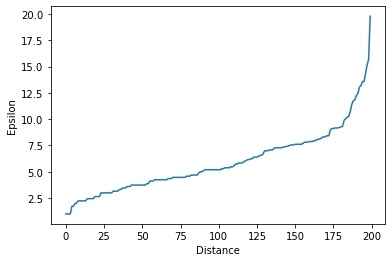

In [14]:
plt.plot(distance)
plt.ylabel("Epsilon")
plt.xlabel("Distance")

In [ ]:
#epsilon=9

In [15]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=9,min_samples=5)
model.fit(df)

DBSCAN(eps=9)

In [16]:
model.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  2,  1, -1, -1,  2,  1,  1,  1,  2,
        1,  1,  2,  2,  2,  2,  2,  1,  2,  2,  1,  2,  2,  2,  1,  2,  2,
        1,  1,  2,  2,  2,  2,  2,  1,  2,  2,  1,  2,  2,  2, -1,  2,  1,
        2,  2,  1, -1,  2,  3,  1,  2,  2,  2,  1,  2,  1,  2,  1,  1,  2,
        3,  1,  2,  1,  3,  2,  3,  3,  3,  1,  2,  1,  1,  1,  3,  2,  2,
        2,  1,  2, -1, -1, -1,  4, -1, -1, -1,  4, -1,  4, -1,  4, -1,  4,
       -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,
        4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1, -1,
       -1, -1, -1,  4, -1,  4, -1, -1, -1,  4, -1,  4, -1,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df)
pca_data=pca.transform(df)

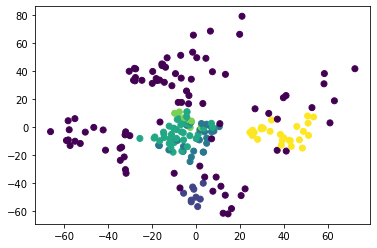

In [19]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=model.labels_)